In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as ran


In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
# import tensorflow as tf

In [4]:
import tensorflow.keras.datasets.mnist as mnist

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
# Test plot to see an image
def display_digit(num):
    print(y_train[num])
    label = y_train[num].argmax(axis=0)
    image = X_train[num].reshape([28,28])
    plt.title('Example: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.grid()
    plt.show()


5


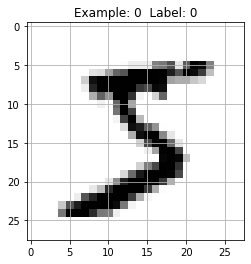

In [9]:
display_digit(0)

In [10]:
X_train = X_train/255
X_test = X_test/255

In [11]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
def flatter(matrix):
    return [item for row in matrix for item in row]

In [13]:
X_train_vector = [flatter(image) for image in X_train]

In [14]:
X_test_vector = [flatter(image) for image in X_test]

In [15]:
X_train_vector[5]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.050980392156862744,
 0.09803921568627451,
 0.39215686274509803,
 0.

In [16]:
y_train_vector = np.zeros((y_train.size,10))

In [17]:
y_test_vector = np.zeros((y_test.size,10))

In [18]:
for i, j in enumerate(y_train_vector):
    j[y_train[i]] = 1 

In [19]:
y_train_vector[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [20]:
n1 = X_train.shape[0]
n1

60000

In [21]:
n2 = X_test.shape[0]
n2

10000

### Define the ANN

In [22]:
batch_size = 100
batch_num = n1/batch_size
batch_num

600.0

In [23]:
# the layers
input_layer = 784
nodes_hl1 = 512
nodes_hl2 = 256
nodes_hl3 = 128
output_layer = 10

classes = 10

In [24]:
epochs = 20
l_rate = 0.001

In [25]:
def topo(x):
    hl1 = {'w1':tf.Variable(tf.random_normal(input_layer, nodes_hl1)), 'b1':tf.Variable(tf.random_normal(nodes_hl1))}
    hl2 = {'w2':tf.Variable(tf.random_normal(hl1, nodes_hl2)), 'b2':tf.Variable(tf.random_normal(nodes_hl2))}
    hl3 = {'w3':tf.Variable(tf.random_normal(hl2, nodes_hl3)), 'b3':tf.Variable(tf.random_normal(nodes_hl3))}
    output_layer = {'w':tf.Variable(tf.random_normal(hl3, classes)), 'b':tf.Variable(tf.random_normal(classes))}
    
    l1 = tf.matmul(x, hl1['w1'])
    l1 = tf.add(l1, hl1['b1'])
    l1 =  tf.nn.relu(l1)
    
    l2 = tf.nn.relu(tf.add(tf.matmul(hl1, hl2['w2']), hl2['b2']))
    
    l3 = tf.nn.relu(tf.add(tf.matmul(hl2, hl3['w3']), hl3['b3']))
    
    out = tf.matmul(l3, output_layer['w']) + output_layer['b']
    
    return out

In [36]:
x = tf.placeholder('float', [None, 784])
y = tf.placeholder('float', [None, 10])


In [37]:
# Validation function - will be used during the training
def validate(predicted, expected):
    correct = tf.equal(tf.argmax(predicted, 1), tf.argmax(expected, 1))
    accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
    print('Accuracy:',accuracy.eval({x:X_test_vector, y:y_test_vector}))


In [38]:
def train_nn(x):
    print(x)
    # Start iteration of prediction using the computation graph above
    prediction = topo(x)
    # estimate the error/cost/loss 
    # based on the probability that the classes are mutually exclusive, so labels are informative
    cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits_v2(logits=prediction, labels=y) )
    # cost has the value we try to minimize by manipulating the weights
    # minimise the cost by optimization function
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    # Create session    
    with tf.Session() as sess:
        # initialize the variables we created
        sess.run(tf.global_variables_initializer())        
        # start iterations for each epoch
        for epoch in range(epochs):
            epoch_loss = 0
            i=0
            # same for each batch (partition of our data)
            while i < 10:
                start = i
                end = i+batch_size
                # get the next batch of random data
                epoch_x = np.array(X_train_vector[start:end])
                epoch_y = np.array(y_train_vector[start:end])
                # feeding the placeholders for x and y
                _, c = sess.run([optimizer, cost], feed_dict={x: epoch_x, y: epoch_y})
                epoch_loss += c
                i+=batch_size
                
            #Validate the accuracy
            validate(prediction, y)

            #Validate the accuracy
            validate(prediction, y)



In [39]:
train_nn(x)

Tensor("Placeholder_8:0", shape=(?, 784), dtype=float32)


ValueError: Shape must be rank 1 but is rank 0 for 'random_normal_2/RandomStandardNormal' (op: 'RandomStandardNormal') with input shapes: [].